# 회귀


- 회귀는 언제 사용하는가
  - 분류와는 다르게 예측하는데 사용한다.
    - ex) 배달도착 시간, 주식가격,
  - k-최근접 이웃 분류에서는 데이터가 위치한 좌표에서 가까운 다른 데이터들을 참고해 해당 데이터가 어떤 분류에 속하는지 **분류**했다.
  - k-최근접 이웃 회귀는 데이터가 위치한 좌표에서 가까운 다른 데이터들을 참고해 해당 데이터가 어떤 타깃(Y)을 가지게 될지 한다.


## 농어의 길이로 무게를 예측해보자 

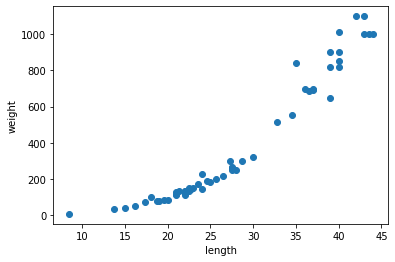

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(
    perch_length, perch_weight, random_state=42
) 
print(train_X)
train_X = train_X.reshape(-1, 1) # == train_X.reshape(42, 1)
test_X = test_X.reshape(-1, 1)
print(train_X)
print(test_X.reshape(-1, 2))

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
[[ 8.4 18. ]
 [27.5 21.3]
 [22.5 40. ]
 [30.  24.6]
 [39.  21. ]
 [43.5 16.2]
 [28.  27.3]]


- 1차원 데이터를 2차원으로 만들기 위해 `.reshape`사용
  - 데이터의 크기는 (42, )인데 이것을 (42, 1)로 바꾸려고한다. 
  - 데이터의 길이를 매번 외우는것보다 `-1`인자를 전달하면 배열을 만들 떄 알아서 기존 데이터의 길이만큼 2차원배열의 길이를 만들어준다..

## 결정계수 (R^2) 란?
- KNeighborsRegressor 사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 것 
- 회귀에서는 100퍼센트라는 값은 불가능하다. 회귀에서는 평가시에 결정계수를 사용한다 -> R^2
  - R^2 = 1 - ((Y - 예측)^2 / (Y - 평균)^2)
    - 결정계수가 1에 가까울 수록 제대로된 예측을 하는것


In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_X, train_Y)
print(f'테스트 세트로 확인한 모델의 성능 {knr.score(test_X, test_Y)}')

# 회귀 모델의 측정을 위한 metrics

from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_X)
mae = mean_absolute_error(test_Y, test_prediction)
print(f'훈련된 모델로 테스트 세트를 확인했을떄 {mae}g 만큼 평균적으로 값이 차이난다.')
 

테스트 세트로 확인한 모델의 성능 0.9928094061010639
훈련된 모델로 테스트 세트를 확인했을떄 19.157142857142862g 만큼 평균적으로 값이 차이난다.


In [5]:
print(f'훈련 세트로 확인한 모델의 성능 {knr.score(train_X, train_Y)}')


훈련 세트로 확인한 모델의 성능 0.9698823289099255


### overfitting, underfitting
```
if 훈련세트 점수 > 테스트 세트 점수
  overfitting
```
- 둘다 점수가 높거나, 둘다 너무 낮은 경우
  - underfitting

---
- 이웃하는 데이터를 참고하는 갯수를 수정하여 해당 부분을 극복할 수 있다.
  - `.n_neighbors`
    - overfitting인 경우 -> 모델을 더 복잡하게 -> k값 증가 시킴 -> .n_neighbors 증가시키고 훈련
    - underfitting인 경우 -> 모델을 더 간단하게 -> k값 감소 시킴 -> .n_neighbors 감소시키고 훈련

In [6]:
def set_n(n):
  knr.n_neighbors = n 
  knr.fit(train_X, train_Y)
  print(f'n: {n}')
  print(f'훈련셋 {knr.score(train_X, train_Y)}')
  print(f'테스트셋  {knr.score(test_X, test_Y)}')
set_n(1)
set_n(2)
set_n(3)
set_n(4)

n: 1
훈련셋 0.9852830341215901
테스트셋  0.991309195814175
n: 2
훈련셋 0.9828437127041165
테스트셋  0.9725010241788556
n: 3
훈련셋 0.9804899950518966
테스트셋  0.974645996398761
n: 4
훈련셋 0.978211389719245
테스트셋  0.9840231023848637


## 선형 회귀 (Linear regression)
- 현실세계의 데이터는 생각한 것만큼 이상적이지 않다.
  - 잡히는 물고기들 중에서는 평균크기에서 벗어난 대어들이 존재하듯
- 선형 회귀는 비교적 간단하고 성능이 뛰어나서 널리 사용된다. 선형이란 단어에서 짐작할 수 있듯이 특성이 하나인 경우 어떤 직선을 학슴하는 알고리즘 이다.
- 아래 이미지를 보면 3번의 빨간선이 가장 알맞게 직선이다.
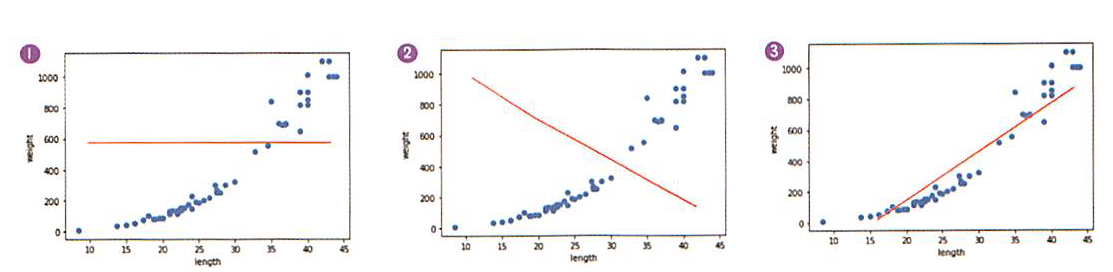


50짜리 농어의 예측무게: [1033.33333333]
인접한 3개의 데이터의 평균: 1033.3333333333333


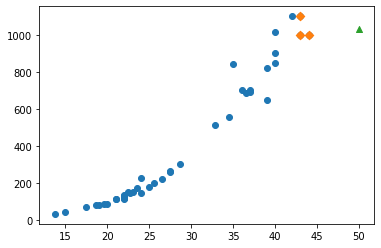

In [38]:
from sklearn.model_selection import train_test_split

class MLutil():
  def __init__(self, X, Y): 
    X, Y = X, Y
  
  def get_sets(self):
    train_X, test_X, train_Y, test_Y = train_test_split(
      perch_length, perch_weight, random_state=42
    )
    return train_X, test_X, train_Y, test_Y

 
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

limited =  MLutil(perch_length, perch_weight)
train_X, test_X, train_Y, test_Y = limited.get_sets()
train_X = train_X.reshape(-1, 1)
test_X = test_X.reshape(-1, 1)
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_X, train_Y)
big_fish = [50]
print(f'50짜리 농어의 예측무게: {knr.predict([big_fish])}')

# 50센티짜리의 이웃 데이터를 주황색으로 표현
distances, indexes = knr.kneighbors([big_fish])
plt.scatter(train_X, train_Y)
plt.scatter(train_X[indexes], train_Y[indexes], marker='D')
plt.scatter(50, 1033, marker="^")
print(f'인접한 3개의 데이터의 평균: {np.mean(train_Y[indexes])}')
# 단순히 가장 가까운 데이터들의 평균을 보여주기 때문에 무게가 100가되든 1000가 되든 나오는 예측값은 동일해진다.
# 이것이 k-최근접 이웃의 한계 이다.

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X, train_Y)
print(f'선형회귀로 예측한 50cm 농어의 무게는 {lr.predict([big_fish])[0]}')

선형회귀로 예측한 50cm 농어의 무게는 1241.8386032279625


y = a*x + b
- LR 모델이 학습하여 만든 직선의 방정식의 절편(b)과 기울기는 모델내부에서 확인 할 수 있다. -> 이를 모델 파라미터라고 부른다.
  - 이처럼 최적의 모델 파라미터를 찾아가는 것을 모델 기반 학습이라고 한다.
  - k-최근접 이웃처럼 사례기반으로 학습하는 것은 사례기반 학습이라고한다. 

In [40]:
print(f'a, b {lr.coef_[0], lr.intercept_}') # coefficient 계수or가중치라고 불린다.


a, b (39.0171449636302, -709.0186449535477)


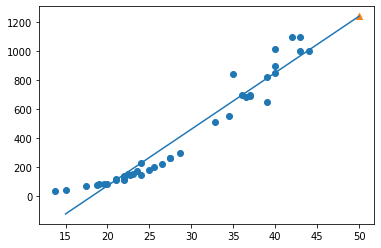

In [41]:
def vis_graph(X, Y, lr):
  plt.scatter(X, Y)
  # 15~50 까지의 1차방정식
  plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50* lr.coef_ + lr.intercept_])
  #  50cm자리 1241 무게의 송어데이터
  plt.scatter(50, 1241.8, marker="^")
  plt.show()

vis_graph(train_X, train_Y, lr)

In [42]:
print(f'선형회귀로 예측한 1cm 농어의 무게는 {lr.predict([[1]])[0]}') # 무게는 음수값을 가질 수 없다. 이를 해결하기 위해서는 모델을 다항식 그래프로 만들어야한다.

선형회귀로 예측한 1cm 농어의 무게는 -670.0014999899174


(42, 2) (14, 2)
[1573.98423528]
a, b (array([  1.01433211, -21.55792498]), 116.05021078278276)
1.0143321093767301 -21.557924978837352 116.05021078278276


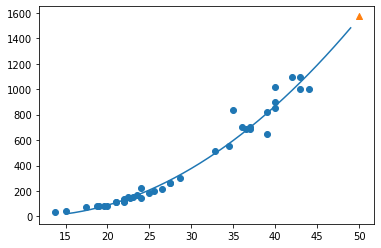

0.9706807451768623
0.9775935108325122


In [59]:

train_poly = np.column_stack((train_X ** 2, train_X))
test_poly = np.column_stack((test_X ** 2, test_X))
print(train_poly.shape, test_poly.shape) # [[제곱, 원래값],[제곱, 원래값], ...] 해당값으로 다시훈련시켜보자

lr2 = LinearRegression()
lr2.fit(train_poly, train_Y)
print(lr2.predict([[big_fish[0] ** 2, big_fish[0]]]))
print(f'a, b {lr2.coef_, lr2.intercept_}') # coefficient 계수or가중치라고 불린다.

def vis_graph(X, Y, lr):
  print(lr.coef_[0], lr.coef_[1], lr.intercept_)
  point = np.arange(15, 50)
  plt.scatter(X, Y)
  # 15~50 까지의 다항 식
  # plt.plot(point, lr.coef_[0]*point ** 2 - lr.coef_[1] * point + lr.intercept_)
  plt.plot(point, 1.01*point ** 2 - 21.6 * point + 116.05)
  #  50cm자리 1574 무게의 송어데이터
  plt.scatter([50], [1574], marker="^")
  plt.show()

vis_graph(train_X, train_Y, lr2)

print(lr2.score(train_poly, train_Y))
print(lr2.score(test_poly, test_Y))